#### Predicting Daily Bixi Usage in 2019

#### Coded by: Zi Chao Zhang

In [6]:
data_urls = {
  "2014": "https://sitewebbixi.s3.amazonaws.com/uploads/docs/biximontrealrentals2014-f040e0.zip",
  "2015": "https://sitewebbixi.s3.amazonaws.com/uploads/docs/biximontrealrentals2015-69fdf0.zip",
  "2016": "https://sitewebbixi.s3.amazonaws.com/uploads/docs/biximontrealrentals2016-912f00.zip",
  "2017": "https://sitewebbixi.s3.amazonaws.com/uploads/docs/biximontrealrentals2017-d4d086.zip",
  "2018": "https://sitewebbixi.s3.amazonaws.com/uploads/docs/biximontrealrentals2018-96034e.zip",
  "2019": "https://sitewebbixi.s3.amazonaws.com/uploads/docs/biximontrealrentals2019-33ea73.zip",
}

In [7]:
"""
Load all the data

We will need:
- the requests package to surf the web, 
- the io package to read the data stream from the response,
- the zipfile package to manipulate the archive.
"""
import io
import pandas as pd
import requests
import zipfile

df = None
for year, url in data_urls.items():
  print("Processing {}".format(year))
  # Load the url
  response = requests.get(url)
  # Read the archive from the response
  archive = zipfile.ZipFile(io.BytesIO(response.content))
  # Loop over all the files in the archive
  for file in archive.namelist():
    # Check that we are looking at one of the files we want
    if not archive.getinfo(file).is_dir() and "Station" not in file:
      print("Loading data from: {}".format(file))
      # We will load the start_date column only to save on memory use
      try:
        current_length = len(df)
        df = df.append(
          pd.read_csv(archive.open(file), usecols=["start_date","is_member"]),
          ignore_index=True, 
        )
      except:
        current_length = 0
        df = pd.read_csv(archive.open(file), usecols=["start_date","is_member"])
      print(" > {} rows processed".format(len(df) - current_length))
  response.close()

Processing 2014
Loading data from: BixiMontrealRentals2014/OD_2014-04.csv
 > 108264 rows processed
Loading data from: BixiMontrealRentals2014/OD_2014-05.csv
 > 455261 rows processed
Loading data from: BixiMontrealRentals2014/OD_2014-06.csv
 > 525863 rows processed
Loading data from: BixiMontrealRentals2014/OD_2014-07.csv
 > 569352 rows processed
Loading data from: BixiMontrealRentals2014/OD_2014-08.csv
 > 556780 rows processed
Loading data from: BixiMontrealRentals2014/OD_2014-09.csv
 > 477545 rows processed
Loading data from: BixiMontrealRentals2014/OD_2014-10.csv
 > 331818 rows processed
Loading data from: BixiMontrealRentals2014/OD_2014-11.csv
 > 111393 rows processed
Processing 2015
Loading data from: BixiMontrealRentals2015/OD_2015-04.csv
 > 150271 rows processed
Loading data from: BixiMontrealRentals2015/OD_2015-05.csv
 > 545678 rows processed
Loading data from: BixiMontrealRentals2015/OD_2015-06.csv
 > 547238 rows processed
Loading data from: BixiMontrealRentals2015/OD_2015-07.c

In [8]:
df1 = df   #will later be used for number of members
df1

,start_date,is_member
0,2014-04-15 00:01,1
1,2014-04-15 00:01,1
2,2014-04-15 00:01,1
3,2014-04-15 00:01,1
4,2014-04-15 00:02,1
...,...,...
26195977,2019-10-31 23:52:45,1
26195978,2019-10-31 23:53:59,1
26195979,2019-10-31 23:55:26,1
26195980,2019-10-31 23:56:28,1


In [9]:
df['start_date'] = pd.to_datetime(df['start_date'])
df.head()

,start_date,is_member
0,2014-04-15 00:01:00,1
1,2014-04-15 00:01:00,1
2,2014-04-15 00:01:00,1
3,2014-04-15 00:01:00,1
4,2014-04-15 00:02:00,1


In [10]:
df['date'] = df['start_date'].dt.date
df

,start_date,is_member,date
0,2014-04-15 00:01:00,1,2014-04-15
1,2014-04-15 00:01:00,1,2014-04-15
2,2014-04-15 00:01:00,1,2014-04-15
3,2014-04-15 00:01:00,1,2014-04-15
4,2014-04-15 00:02:00,1,2014-04-15
...,...,...,...
26195977,2019-10-31 23:52:45,1,2019-10-31
26195978,2019-10-31 23:53:59,1,2019-10-31
26195979,2019-10-31 23:55:26,1,2019-10-31
26195980,2019-10-31 23:56:28,1,2019-10-31


In [11]:
date_df = df['date'].value_counts(normalize=True).sort_index()
date_df

2014-04-15    0.000060
2014-04-16    0.000121
2014-04-17    0.000223
2014-04-18    0.000203
2014-04-19    0.000230
                ...   
2019-10-27    0.000168
2019-10-28    0.000745
2019-10-29    0.000893
2019-10-30    0.000879
2019-10-31    0.000389
Name: date, Length: 1281, dtype: float64

In [12]:
year2014_df = df.loc[df['start_date'].dt.year == 2014]['date'].value_counts(normalize=True).sort_index()
year2014_df

2014-04-15    0.000503
2014-04-16    0.001014
2014-04-17    0.001866
2014-04-18    0.001698
2014-04-19    0.001923
                ...   
2014-11-11    0.003096
2014-11-12    0.002077
2014-11-13    0.002551
2014-11-14    0.002228
2014-11-15    0.001197
Name: date, Length: 215, dtype: float64

In [13]:
import matplotlib.pyplot as plt

C:\Users\user\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


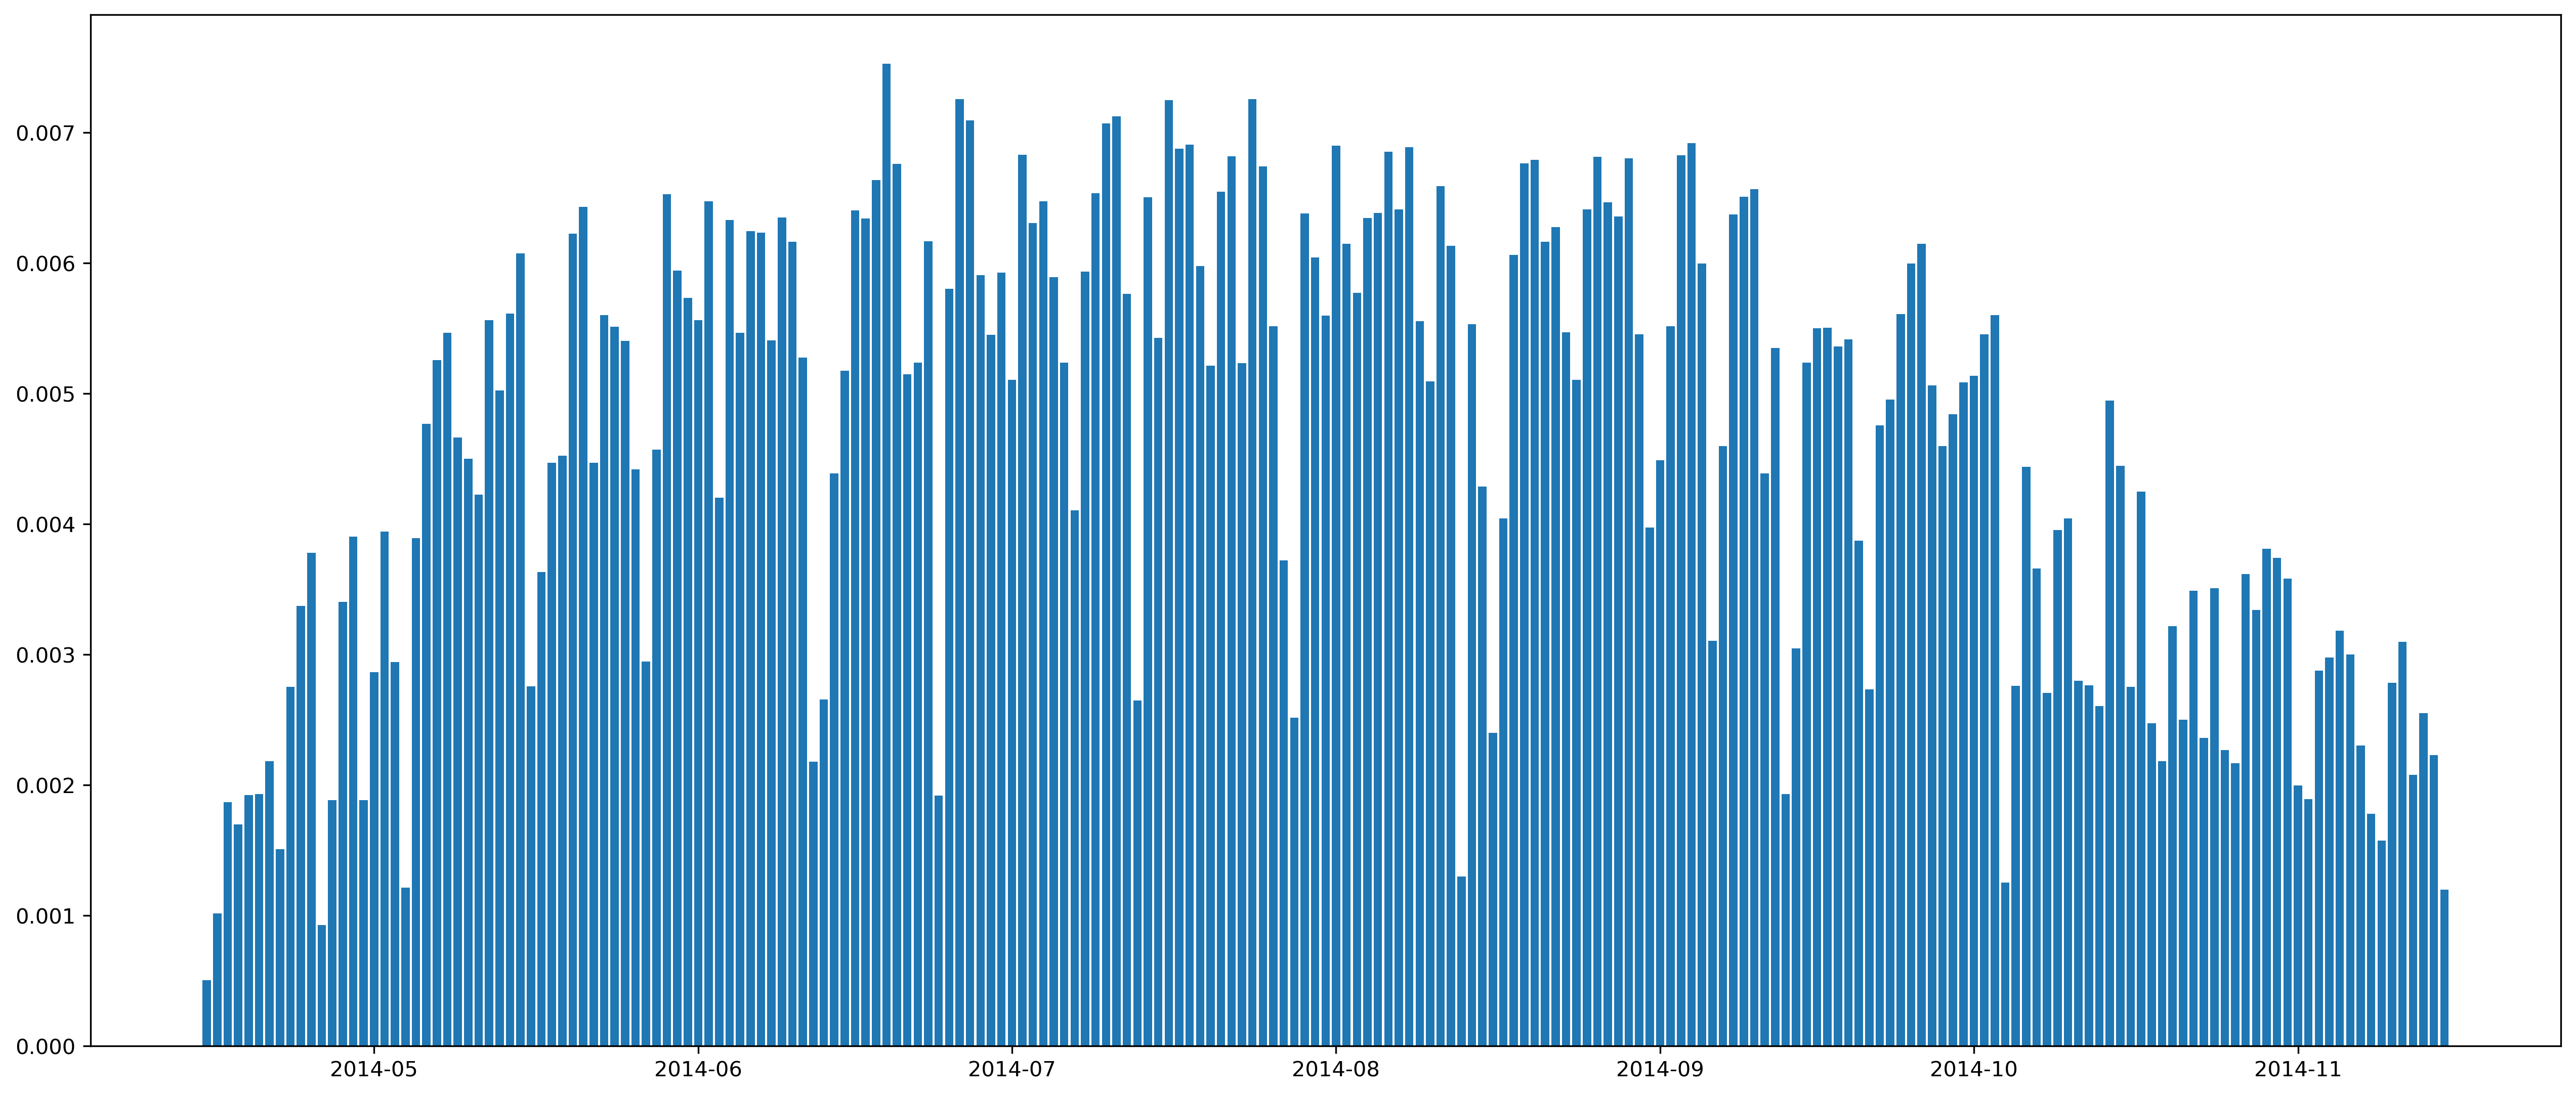

In [14]:
# Plot number of bixi rides (normalized) per day of 2014
plt.figure(figsize=[21,9], dpi=300)
plt.bar(year2014_df.index, year2014_df.values)
plt.show()

In [15]:
# From the graph, we see more bixi rides during the warmer months, and less bixi rides during the april-may and october-november

#### Add Feature: Day of the Week

In [16]:
df['day of the week'] = df['start_date'].dt.day_name()
df

,start_date,is_member,date,day of the week
0,2014-04-15 00:01:00,1,2014-04-15,Tuesday
1,2014-04-15 00:01:00,1,2014-04-15,Tuesday
2,2014-04-15 00:01:00,1,2014-04-15,Tuesday
3,2014-04-15 00:01:00,1,2014-04-15,Tuesday
4,2014-04-15 00:02:00,1,2014-04-15,Tuesday
...,...,...,...,...
26195977,2019-10-31 23:52:45,1,2019-10-31,Thursday
26195978,2019-10-31 23:53:59,1,2019-10-31,Thursday
26195979,2019-10-31 23:55:26,1,2019-10-31,Thursday
26195980,2019-10-31 23:56:28,1,2019-10-31,Thursday


In [17]:
# Re-index column: day of the week
day_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [18]:
day_name_df = df['day of the week'].value_counts(normalize=True).reindex(day_order)
day_name_df

Monday       0.135983
Tuesday      0.149738
Wednesday    0.155767
Thursday     0.155081
Friday       0.152197
Saturday     0.129792
Sunday       0.121440
Name: day of the week, dtype: float64

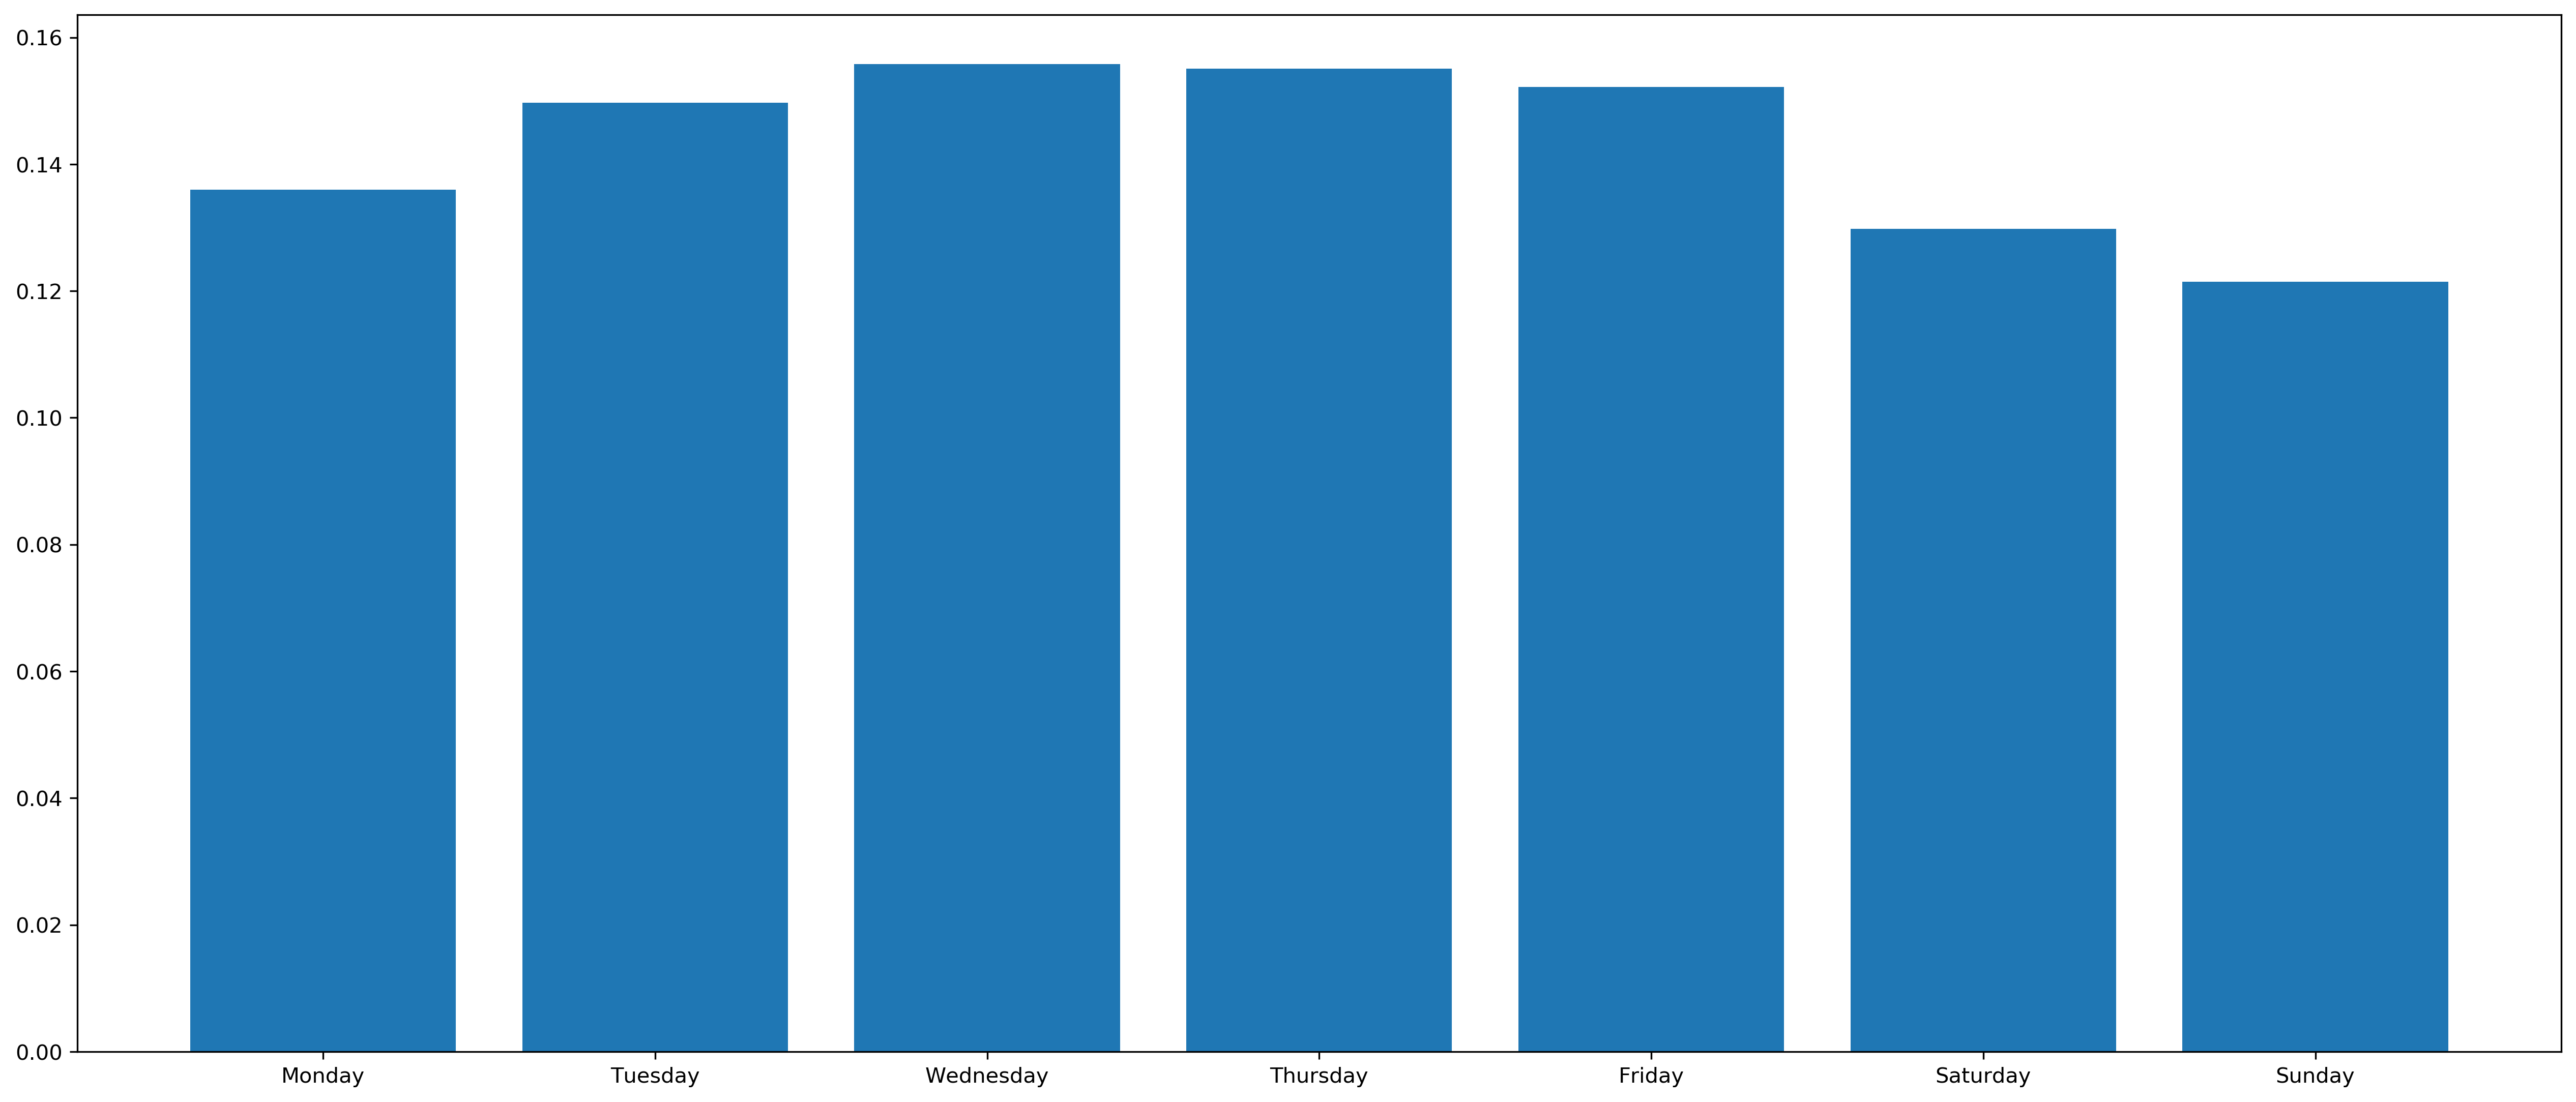

In [19]:
# Graph: Bixi Rides for Each Day of the Week
plt.figure(figsize=[21,9], dpi=300)
plt.bar(day_name_df.index, day_name_df.values)
plt.show()

In [20]:
# We can see there are less bixi rides on the weekends. Our guess is that many people ride bixies to go to work.  

#### Add Feature: Month 

In [21]:
df['month'] = df['start_date'].dt.month_name()
df

,start_date,is_member,date,day of the week,month
0,2014-04-15 00:01:00,1,2014-04-15,Tuesday,April
1,2014-04-15 00:01:00,1,2014-04-15,Tuesday,April
2,2014-04-15 00:01:00,1,2014-04-15,Tuesday,April
3,2014-04-15 00:01:00,1,2014-04-15,Tuesday,April
4,2014-04-15 00:02:00,1,2014-04-15,Tuesday,April
...,...,...,...,...,...
26195977,2019-10-31 23:52:45,1,2019-10-31,Thursday,October
26195978,2019-10-31 23:53:59,1,2019-10-31,Thursday,October
26195979,2019-10-31 23:55:26,1,2019-10-31,Thursday,October
26195980,2019-10-31 23:56:28,1,2019-10-31,Thursday,October


In [22]:
month_order = ['April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']

In [23]:
month_df = df['month'].value_counts(normalize=True).reindex(month_order)
month_df

April        0.042904
May          0.143792
June         0.163709
July         0.184752
August       0.179581
September    0.154573
October      0.104510
November     0.026180
Name: month, dtype: float64

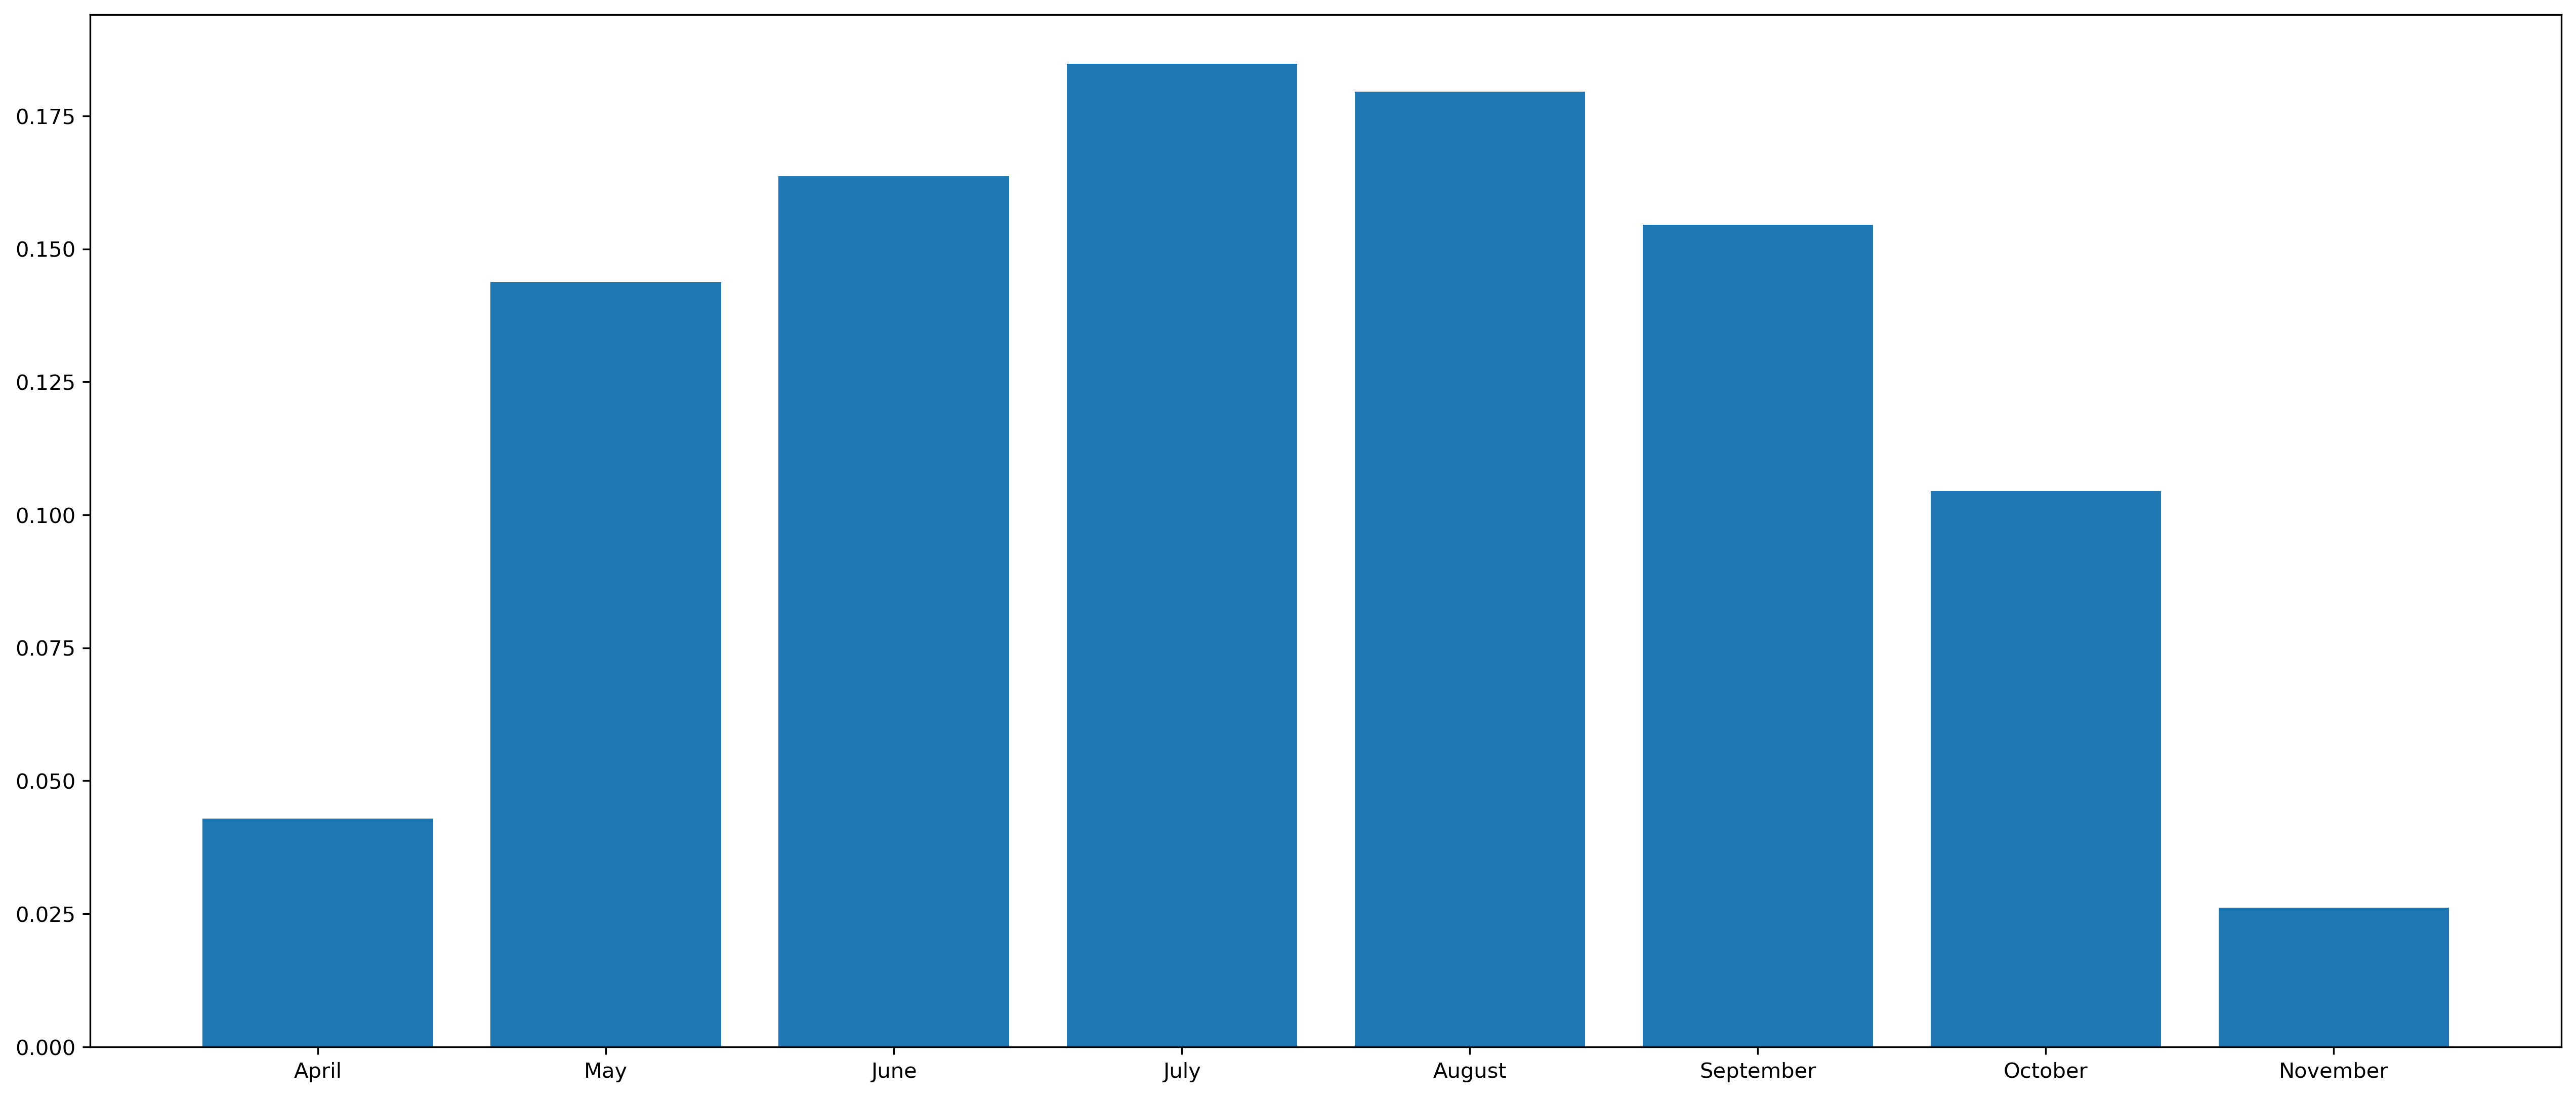

In [24]:
plt.figure(figsize=[21,9], dpi=300)
plt.bar(month_df.index, month_df.values)
plt.show()

In [25]:
# More bixi rides in the summer months, warm weather probably helps...

In [26]:
# Target Vector (1D matrix)
target_vector = df.groupby('date').size()
target_vector

date
2014-04-15     1577
2014-04-16     3180
2014-04-17     5852
2014-04-18     5325
2014-04-19     6031
              ...  
2019-10-27     4394
2019-10-28    19505
2019-10-29    23396
2019-10-30    23025
2019-10-31    10195
Length: 1281, dtype: int64

In [27]:
# Features Matrix (2D matrix)
features_df = pd.get_dummies(df.drop('start_date', axis=1), prefix='', prefix_sep='', columns=['day of the week', 'month'])
features_df

,is_member,date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,July,June,May,November,October,September
0,1,2014-04-15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1,1,2014-04-15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,1,2014-04-15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
3,1,2014-04-15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
4,1,2014-04-15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26195977,1,2019-10-31,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
26195978,1,2019-10-31,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
26195979,1,2019-10-31,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
26195980,1,2019-10-31,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [28]:
# Remove duplicate dates
features_df.drop_duplicates(subset='date', keep='first', inplace=True)
features_df

,is_member,date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,July,June,May,November,October,September
0,1,2014-04-15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
1577,1,2014-04-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
4757,1,2014-04-17,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
10609,1,2014-04-18,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
15934,1,2014-04-19,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26115467,1,2019-10-27,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
26119861,1,2019-10-28,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
26139366,1,2019-10-29,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
26162762,1,2019-10-30,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [29]:
# Set correct features matrix index 
features_df.set_index(target_vector.index, drop=True, inplace=True)
features_df

,is_member,date,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,July,June,May,November,October,September
date,,,,,,,,,,,,,,,,,
2014-04-15,1,2014-04-15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2014-04-16,1,2014-04-16,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
2014-04-17,1,2014-04-17,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2014-04-18,1,2014-04-18,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2014-04-19,1,2014-04-19,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-27,1,2019-10-27,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2019-10-28,1,2019-10-28,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2019-10-29,1,2019-10-29,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [30]:
# Re-order feature matrix columns AND drop redundant columns(by convention: remove one column from each category)
cols = day_name_df.index.tolist() + month_df.index.tolist()
features_matrix = features_df[cols].drop(columns=['Monday', 'April'])
features_matrix

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,May,June,July,August,September,October,November
date,,,,,,,,,,,,,
2014-04-15,1,0,0,0,0,0,0,0,0,0,0,0,0
2014-04-16,0,1,0,0,0,0,0,0,0,0,0,0,0
2014-04-17,0,0,1,0,0,0,0,0,0,0,0,0,0
2014-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0
2014-04-19,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-27,0,0,0,0,0,1,0,0,0,0,0,1,0
2019-10-28,0,0,0,0,0,0,0,0,0,0,0,1,0
2019-10-29,1,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:
# Machine Learning 
from sklearn.linear_model import LinearRegression

In [32]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
model.fit(features_matrix, target_vector)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
model.coef_

array([ 1878.46095714,  2721.81752806,  2705.62650158,  2307.50879885,
        -906.97003128, -2106.64540438,  9179.95924522, 12800.06897452,
       14987.07634578, 14235.48306774, 11475.09211643,  3659.96735704,
       -1890.14089608])

In [35]:
model.intercept_

10097.21725540056

In [36]:
params = pd.Series(model.coef_, index=features_matrix.columns)
params

Tuesday       1878.460957
Wednesday     2721.817528
Thursday      2705.626502
Friday        2307.508799
Saturday      -906.970031
Sunday       -2106.645404
May           9179.959245
June         12800.068975
July         14987.076346
August       14235.483068
September    11475.092116
October       3659.967357
November     -1890.140896
dtype: float64

In [37]:
from datetime import datetime

In [38]:
def string_to_datetime(date_str):
    date_datetime = datetime.strptime(date_str, '%Y-%m-%d').date()
    return date_datetime

In [39]:
# August 20th 2018 was a Monday 
features_matrix.loc[string_to_datetime('2018-08-20')]

Tuesday      0
Wednesday    0
Thursday     0
Friday       0
Saturday     0
Sunday       0
May          0
June         0
July         0
August       1
September    0
October      0
November     0
Name: 2018-08-20, dtype: uint8

In [40]:
features_matrix.loc[string_to_datetime('2018-08-20')].values.reshape(1,-1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [41]:
# Prediction of bixi rides on August 20th 2018
model.predict(features_matrix.loc[string_to_datetime('2018-08-20')].values.reshape(1,-1))[0]

24332.700323137266

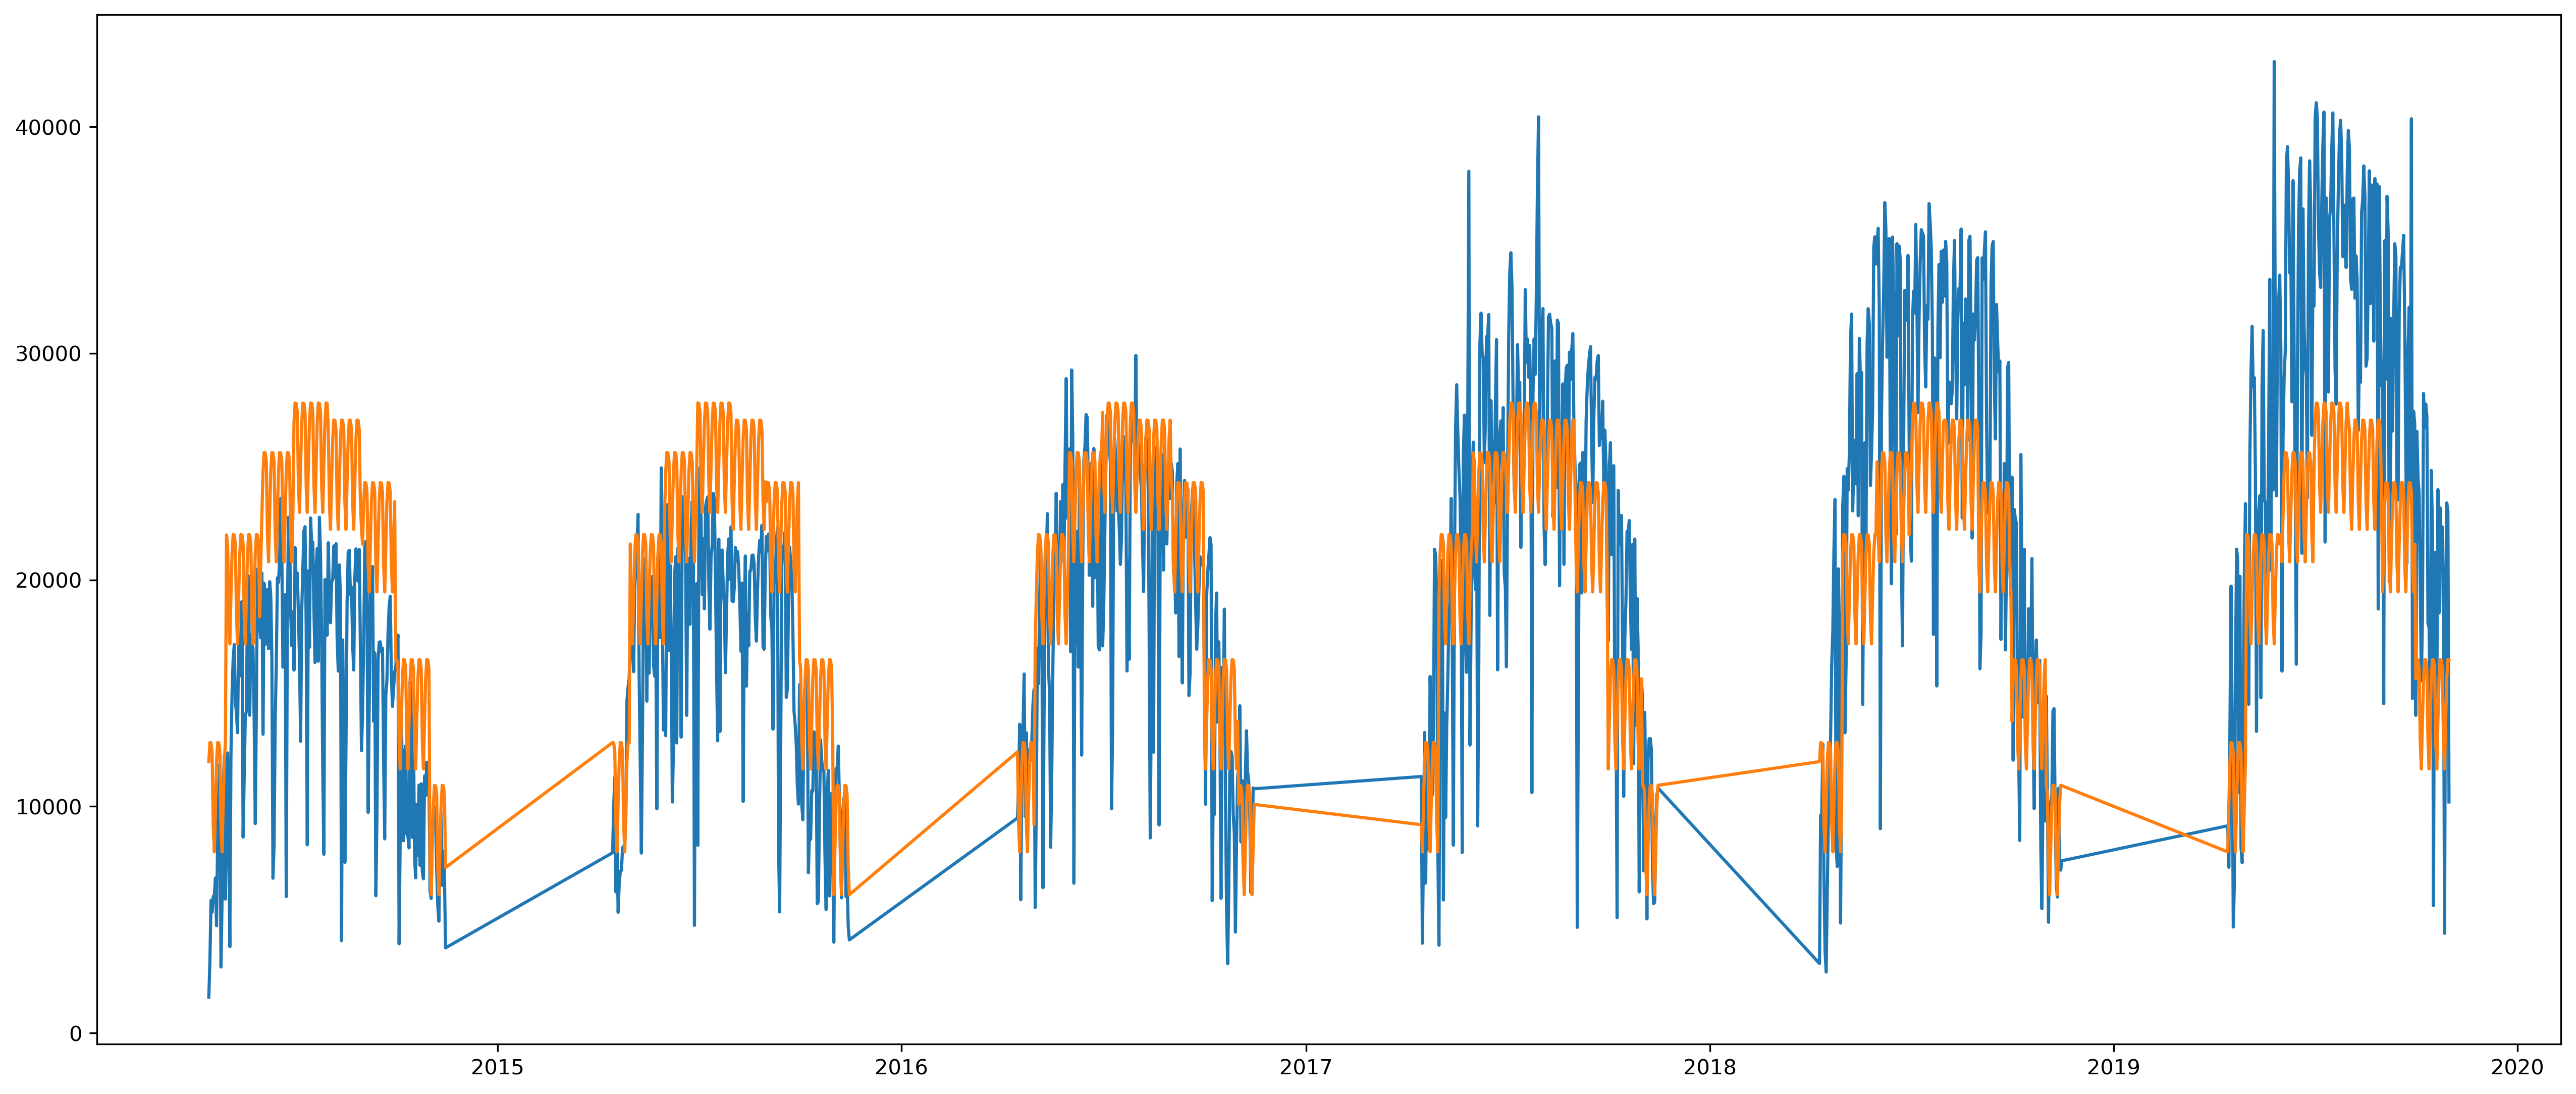

In [42]:
# Plot Prediction vs. Training Data
plt.figure(figsize=[21,9], dpi=300)
plt.plot(features_matrix.index, target_vector, features_matrix.index, model.predict(features_matrix))
plt.show()

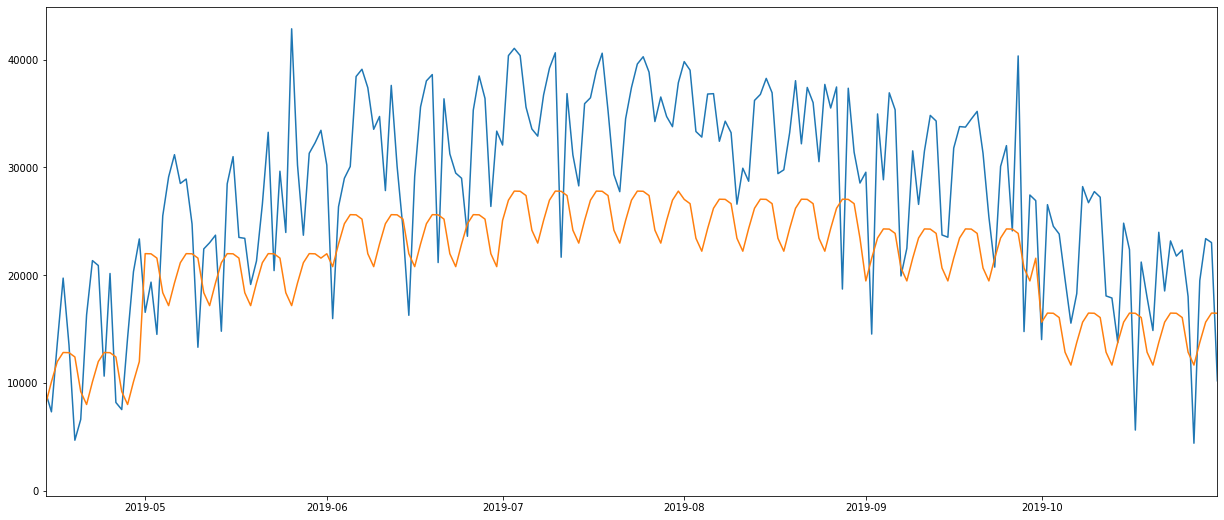

In [43]:
# Prediction for 2019 only
plt.figure(figsize=[21,9])
plt.plot(features_matrix.index, target_vector, features_matrix.index, model.predict(features_matrix))
plt.xlim(left='2019-04-14', right='2019-10-31')
plt.show()

In [44]:
# Resampling Data
import numpy as np
from sklearn.utils import resample
np.random.seed(1)
uncertainty = np.std([model.fit(*resample(features_matrix, target_vector)).coef_ for i in range(1000)], 0)

In [45]:
pd.DataFrame({'params': params.round(0), 'uncertainty': uncertainty.round(0)})

,params,uncertainty
Tuesday,1878.0,668.0
Wednesday,2722.0,656.0
Thursday,2706.0,671.0
Friday,2308.0,655.0
Saturday,-907.0,648.0
Sunday,-2107.0,680.0
May,9180.0,709.0
June,12800.0,778.0
July,14987.0,751.0
August,14235.0,698.0


In [46]:
# Root Mean Squared Error (RMSE)
import math
from sklearn.metrics import mean_squared_error

# Using data including 2019
error = mean_squared_error(model.predict(features_matrix.loc[pd.to_datetime(features_matrix.index).year == 2019]), target_vector.loc[pd.to_datetime(target_vector.index).year == 2019])
print(math.sqrt(error))

8862.627722000754


In [47]:
# Using data prior to 2019
model.fit(features_matrix.loc[pd.to_datetime(features_matrix.index).year < 2019], target_vector.loc[pd.to_datetime(target_vector.index).year < 2019])
error = mean_squared_error(model.predict(features_matrix.loc[pd.to_datetime(features_matrix.index).year == 2019]), target_vector.loc[pd.to_datetime(target_vector.index).year == 2019])
print(math.sqrt(error))

9957.227515234586


#### Add Features: Stations, Weather

#### Number of Stations Increase per Year

In [48]:
# Append Bixi Stations Data
features_matrix['Stations'] = np.nan

stations_2014 = 459
stations_2015 = 460
stations_2016 = 465
stations_2017 = 546
stations_2018 = 552
stations_2019 = 619
for i in range (0,len(features_matrix.index)):
    if pd.to_datetime(features_matrix.index).year[i] == 2014:
        features_matrix['Stations'][i] = stations_2014
    elif pd.to_datetime(features_matrix.index).year[i] == 2015:
        features_matrix['Stations'][i] = stations_2015
    elif pd.to_datetime(features_matrix.index).year[i] == 2016:
        features_matrix['Stations'][i] = stations_2016
    elif pd.to_datetime(features_matrix.index).year[i] == 2017:
        features_matrix['Stations'][i] = stations_2017
    elif pd.to_datetime(features_matrix.index).year[i] == 2018:
        features_matrix['Stations'][i] = stations_2018
    elif pd.to_datetime(features_matrix.index).year[i] == 2019:
        features_matrix['Stations'][i] = stations_2019
features_matrix

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\user\Anaconda3\lib\site-packages\ipykernel

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,May,June,July,August,September,October,November,Stations
date,,,,,,,,,,,,,,
2014-04-15,1,0,0,0,0,0,0,0,0,0,0,0,0,459.0
2014-04-16,0,1,0,0,0,0,0,0,0,0,0,0,0,459.0
2014-04-17,0,0,1,0,0,0,0,0,0,0,0,0,0,459.0
2014-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,459.0
2014-04-19,0,0,0,0,1,0,0,0,0,0,0,0,0,459.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-27,0,0,0,0,0,1,0,0,0,0,0,1,0,619.0
2019-10-28,0,0,0,0,0,0,0,0,0,0,0,1,0,619.0
2019-10-29,1,0,0,0,0,0,0,0,0,0,0,1,0,619.0


In [49]:
model.fit(features_matrix, target_vector)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

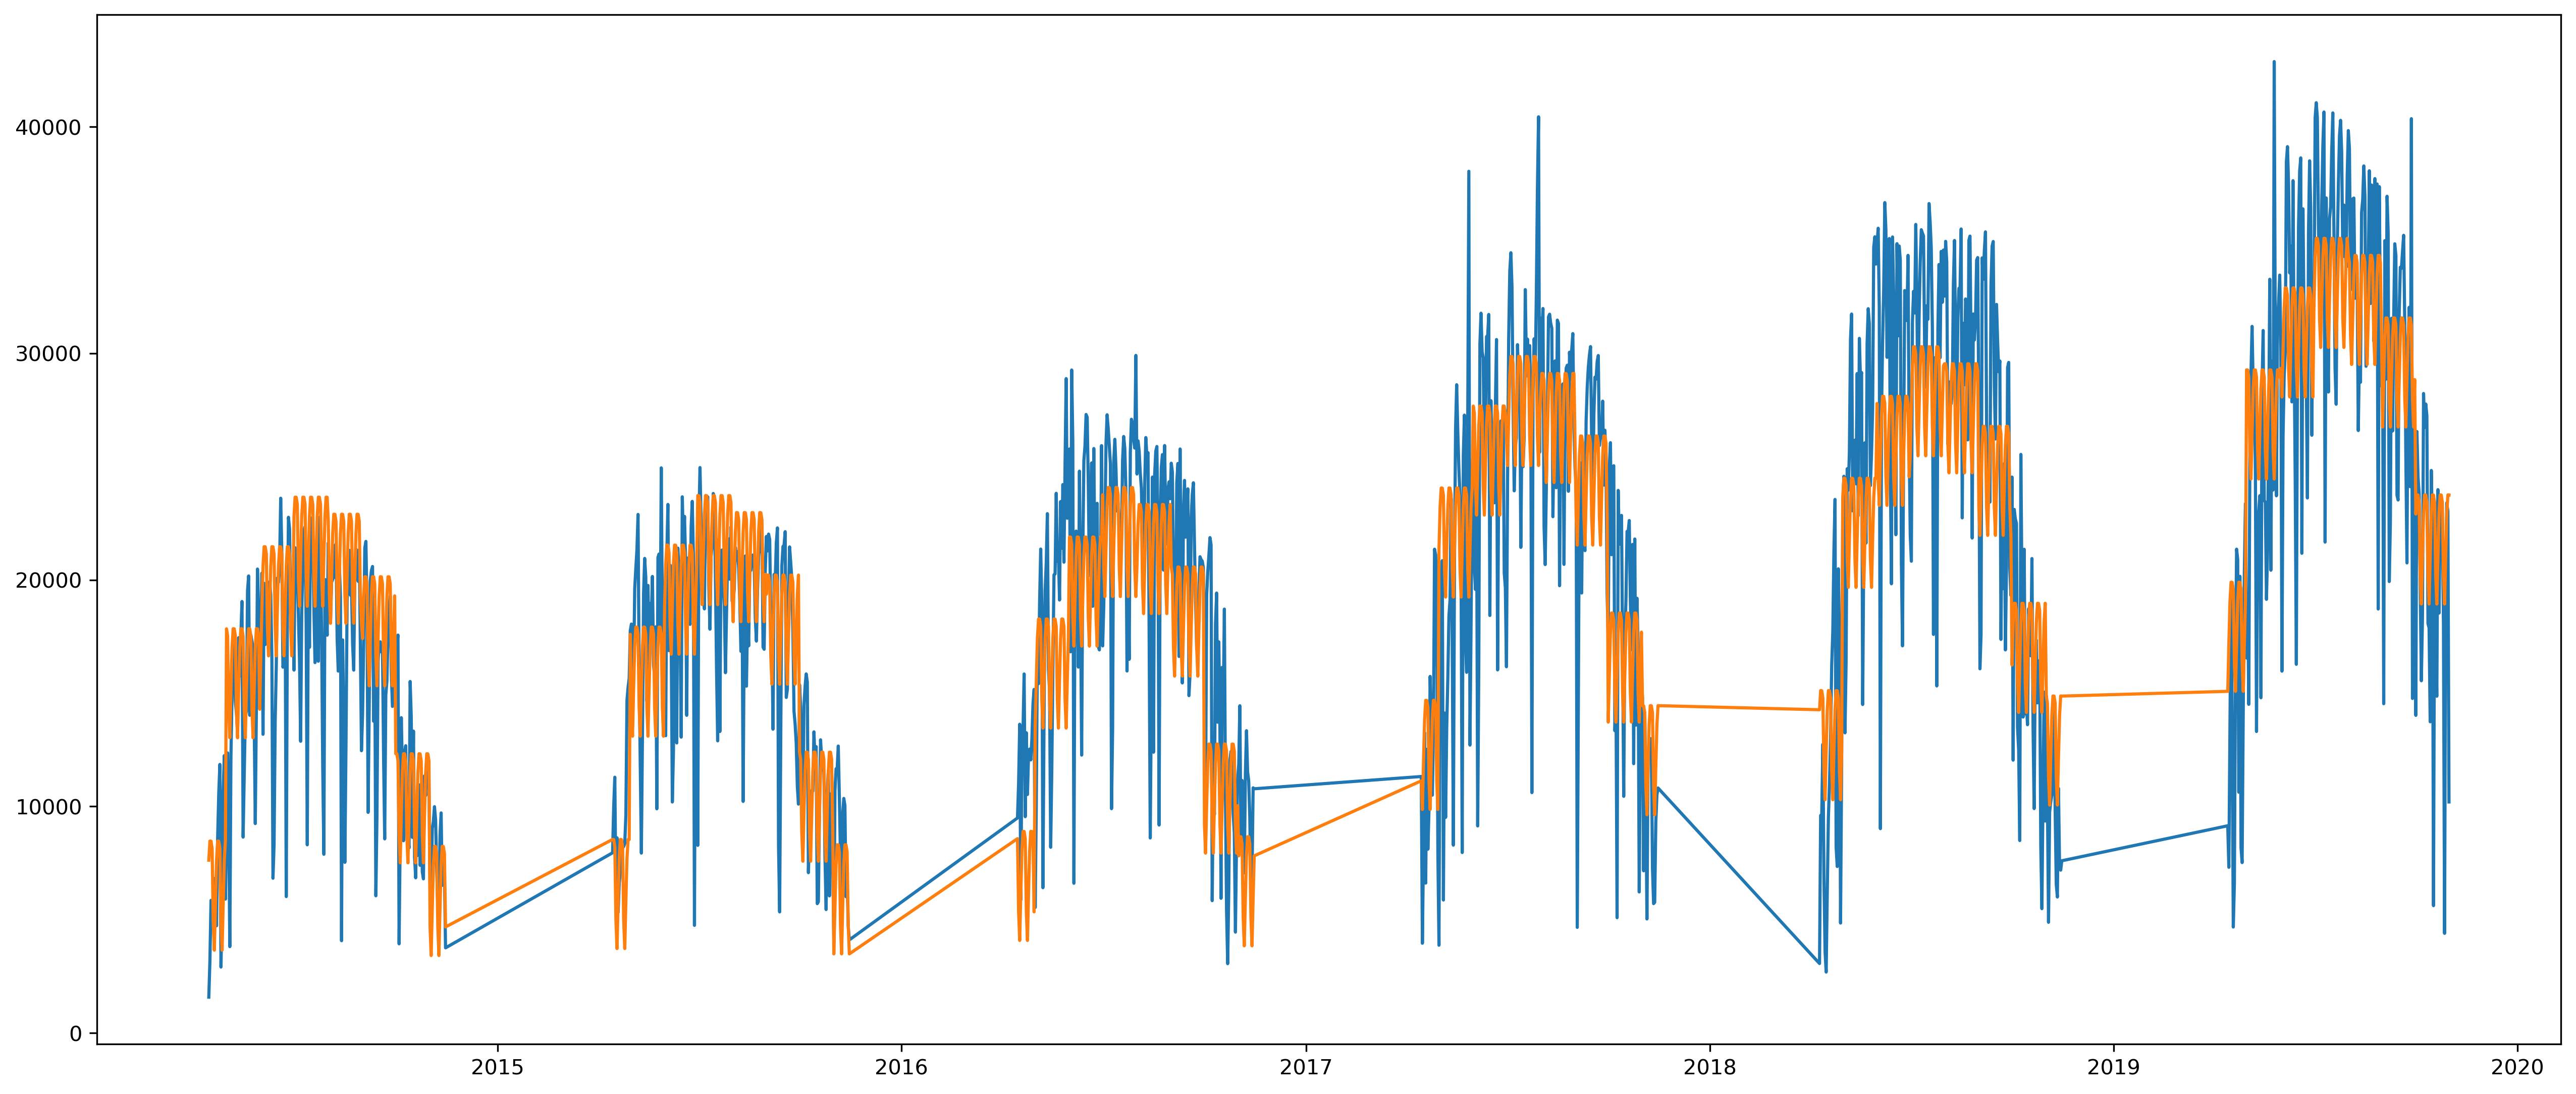

In [50]:
plt.figure(figsize=[21,9], dpi=300)
plt.plot(features_matrix.index, target_vector, features_matrix.index, model.predict(features_matrix))
plt.show()

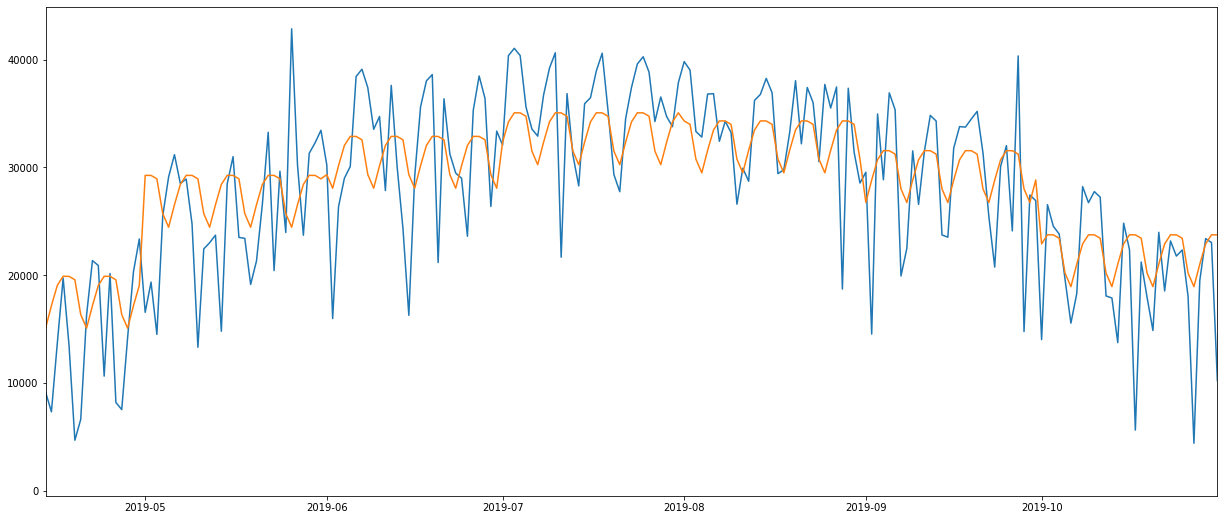

In [51]:
# Prediction for 2019 only
plt.figure(figsize=[21,9])
plt.plot(features_matrix.index, target_vector, features_matrix.index, model.predict(features_matrix))
plt.xlim(left='2019-04-14', right='2019-10-31')
plt.show()

In [52]:
# Using data including 2019
error = mean_squared_error(model.predict(features_matrix.loc[pd.to_datetime(features_matrix.index).year == 2019]), target_vector.loc[pd.to_datetime(target_vector.index).year == 2019])
print(math.sqrt(error))

5739.453834183633


In [53]:
# RMSE using data prior to 2019
model.fit(features_matrix.loc[pd.to_datetime(features_matrix.index).year < 2019], target_vector.loc[pd.to_datetime(target_vector.index).year < 2019])
error = mean_squared_error(model.predict(features_matrix.loc[pd.to_datetime(features_matrix.index).year == 2019]), target_vector.loc[pd.to_datetime(target_vector.index).year == 2019])
print(math.sqrt(error))

6066.849123597833


#### Weather (Temperature, Precipitation, Wind Speed)

In [55]:
# Montreal (Mirabel)
station_id = 48374

# Initialize df with 2014 data
meteo_df = pd.read_csv("https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID={}&Year={}&Day=14&timeframe=2&submit=Download+Data".format(station_id, 2014))

# Append other years
for year in range(2015, 2020):
    meteo_df = meteo_df.append(pd.read_csv("https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID={}&Year={}&Day=14&timeframe=2&submit=Download+Data".format(station_id, year)))

meteo_df

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Data Quality,Max Temp (°C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,-73.42,45.52,MONTREAL/ST-HUBERT,7027329,2014-01-01,2014,1,1,NaN,-15.6,...,NaN,M,0.0,NaN,NaN,NaN,NaN,NaN,<31,NaN
1,-73.42,45.52,MONTREAL/ST-HUBERT,7027329,2014-01-02,2014,1,2,NaN,-22.6,...,NaN,M,0.0,T,NaN,NaN,NaN,NaN,<31,NaN
2,-73.42,45.52,MONTREAL/ST-HUBERT,7027329,2014-01-03,2014,1,3,NaN,-19.2,...,NaN,M,0.0,NaN,NaN,NaN,NaN,NaN,<31,NaN
3,-73.42,45.52,MONTREAL/ST-HUBERT,7027329,2014-01-04,2014,1,4,NaN,-6.6,...,NaN,M,0.0,NaN,NaN,NaN,NaN,NaN,<31,NaN
4,-73.42,45.52,MONTREAL/ST-HUBERT,7027329,2014-01-05,2014,1,5,NaN,0.7,...,NaN,M,10.6,NaN,NaN,NaN,NaN,NaN,<31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,-73.42,45.52,MONTREAL/ST-HUBERT,7027329,2019-12-27,2019,12,27,NaN,3.8,...,NaN,NaN,7.1,NaN,NaN,NaN,26.0,NaN,45,NaN
361,-73.42,45.52,MONTREAL/ST-HUBERT,7027329,2019-12-28,2019,12,28,NaN,4.0,...,NaN,NaN,0.0,NaN,NaN,NaN,25.0,NaN,48,NaN
362,-73.42,45.52,MONTREAL/ST-HUBERT,7027329,2019-12-29,2019,12,29,NaN,0.7,...,NaN,NaN,0.0,NaN,NaN,NaN,5.0,NaN,35,NaN
363,-73.42,45.52,MONTREAL/ST-HUBERT,7027329,2019-12-30,2019,12,30,NaN,-1.5,...,NaN,NaN,9.4,NaN,NaN,NaN,6.0,NaN,52,NaN


In [56]:
# Only keep Date/Time, Mean Temp, and Total Precip columns
weather_df = meteo_df[['Date/Time', 'Mean Temp (°C)', 'Total Precip (mm)', 'Spd of Max Gust (km/h)']]
weather_df

,Date/Time,Mean Temp (°C),Total Precip (mm),Spd of Max Gust (km/h)
0,2014-01-01,-21.0,0.0,<31
1,2014-01-02,-25.4,0.0,<31
2,2014-01-03,-21.9,0.0,<31
3,2014-01-04,-15.4,0.0,<31
4,2014-01-05,-6.0,10.6,<31
...,...,...,...,...
360,2019-12-27,-0.5,7.1,45
361,2019-12-28,1.2,0.0,48
362,2019-12-29,-1.3,0.0,35
363,2019-12-30,-2.8,9.4,52


In [57]:
# Set Date/Time as index 
weather_by_date = weather_df[['Mean Temp (°C)','Total Precip (mm)', 'Spd of Max Gust (km/h)']].set_index(weather_df['Date/Time'], drop=True)
weather_by_date

,Mean Temp (°C),Total Precip (mm),Spd of Max Gust (km/h)
Date/Time,,,
2014-01-01,-21.0,0.0,<31
2014-01-02,-25.4,0.0,<31
2014-01-03,-21.9,0.0,<31
2014-01-04,-15.4,0.0,<31
2014-01-05,-6.0,10.6,<31
...,...,...,...
2019-12-27,-0.5,7.1,45
2019-12-28,1.2,0.0,48
2019-12-29,-1.3,0.0,35


In [58]:
# Only keep the dates we need
weather_features_df = weather_by_date.loc[target_vector.index.astype(str)]
weather_features_df

,Mean Temp (°C),Total Precip (mm),Spd of Max Gust (km/h)
date,,,
2014-04-15,6.2,11.8,<31
2014-04-16,-3.4,0.0,<31
2014-04-17,1.1,0.0,<31
2014-04-18,6.2,0.0,<31
2014-04-19,4.8,1.0,<31
...,...,...,...
2019-10-27,6.5,34.3,55
2019-10-28,8.7,0.4,NaN
2019-10-29,10.0,0.2,54


In [59]:
# There are null values...
weather_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1281 entries, 2014-04-15 to 2019-10-31
Data columns (total 3 columns):
Mean Temp (°C)            1175 non-null float64
Total Precip (mm)         1174 non-null float64
Spd of Max Gust (km/h)    1137 non-null object
dtypes: float64(2), object(1)
memory usage: 40.0+ KB


In [60]:
# Forward fill null values
weather_features_df.fillna(method='ffill', inplace=True)
weather_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1281 entries, 2014-04-15 to 2019-10-31
Data columns (total 3 columns):
Mean Temp (°C)            1281 non-null float64
Total Precip (mm)         1281 non-null float64
Spd of Max Gust (km/h)    1281 non-null object
dtypes: float64(2), object(1)
memory usage: 40.0+ KB


In [61]:
# Set weather dataframe index as the features matrix index (prep for concatenation)
weather_features_df.set_index(features_matrix.index, drop=True, inplace=True)
weather_features_df.index

Index([2014-04-15, 2014-04-16, 2014-04-17, 2014-04-18, 2014-04-19, 2014-04-20,
       2014-04-21, 2014-04-22, 2014-04-23, 2014-04-24,
       ...
       2019-10-22, 2019-10-23, 2019-10-24, 2019-10-25, 2019-10-26, 2019-10-27,
       2019-10-28, 2019-10-29, 2019-10-30, 2019-10-31],
      dtype='object', name='date', length=1281)

In [62]:
# Add weather features to features matrix
features_matrix = pd.concat([features_matrix, weather_features_df], axis=1)
features_matrix

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,May,June,July,August,September,October,November,Stations,Mean Temp (°C),Total Precip (mm),Spd of Max Gust (km/h)
date,,,,,,,,,,,,,,,,,
2014-04-15,1,0,0,0,0,0,0,0,0,0,0,0,0,459.0,6.2,11.8,<31
2014-04-16,0,1,0,0,0,0,0,0,0,0,0,0,0,459.0,-3.4,0.0,<31
2014-04-17,0,0,1,0,0,0,0,0,0,0,0,0,0,459.0,1.1,0.0,<31
2014-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,459.0,6.2,0.0,<31
2014-04-19,0,0,0,0,1,0,0,0,0,0,0,0,0,459.0,4.8,1.0,<31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-27,0,0,0,0,0,1,0,0,0,0,0,1,0,619.0,6.5,34.3,55
2019-10-28,0,0,0,0,0,0,0,0,0,0,0,1,0,619.0,8.7,0.4,55
2019-10-29,1,0,0,0,0,0,0,0,0,0,0,1,0,619.0,10.0,0.2,54


In [63]:
# Replace '<31' by '31'
features_matrix.replace({'<31':'31'}, inplace=True)
features_matrix

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,May,June,July,August,September,October,November,Stations,Mean Temp (°C),Total Precip (mm),Spd of Max Gust (km/h)
date,,,,,,,,,,,,,,,,,
2014-04-15,1,0,0,0,0,0,0,0,0,0,0,0,0,459.0,6.2,11.8,31
2014-04-16,0,1,0,0,0,0,0,0,0,0,0,0,0,459.0,-3.4,0.0,31
2014-04-17,0,0,1,0,0,0,0,0,0,0,0,0,0,459.0,1.1,0.0,31
2014-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,459.0,6.2,0.0,31
2014-04-19,0,0,0,0,1,0,0,0,0,0,0,0,0,459.0,4.8,1.0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-27,0,0,0,0,0,1,0,0,0,0,0,1,0,619.0,6.5,34.3,55
2019-10-28,0,0,0,0,0,0,0,0,0,0,0,1,0,619.0,8.7,0.4,55
2019-10-29,1,0,0,0,0,0,0,0,0,0,0,1,0,619.0,10.0,0.2,54


In [64]:
# Check if there are no more null values
features_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1281 entries, 2014-04-15 to 2019-10-31
Data columns (total 17 columns):
Tuesday                   1281 non-null uint8
Wednesday                 1281 non-null uint8
Thursday                  1281 non-null uint8
Friday                    1281 non-null uint8
Saturday                  1281 non-null uint8
Sunday                    1281 non-null uint8
May                       1281 non-null uint8
June                      1281 non-null uint8
July                      1281 non-null uint8
August                    1281 non-null uint8
September                 1281 non-null uint8
October                   1281 non-null uint8
November                  1281 non-null uint8
Stations                  1281 non-null float64
Mean Temp (°C)            1281 non-null float64
Total Precip (mm)         1281 non-null float64
Spd of Max Gust (km/h)    1281 non-null object
dtypes: float64(3), object(1), uint8(13)
memory usage: 106.3+ KB


In [65]:
# Machine Learning
model.fit(features_matrix, target_vector)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

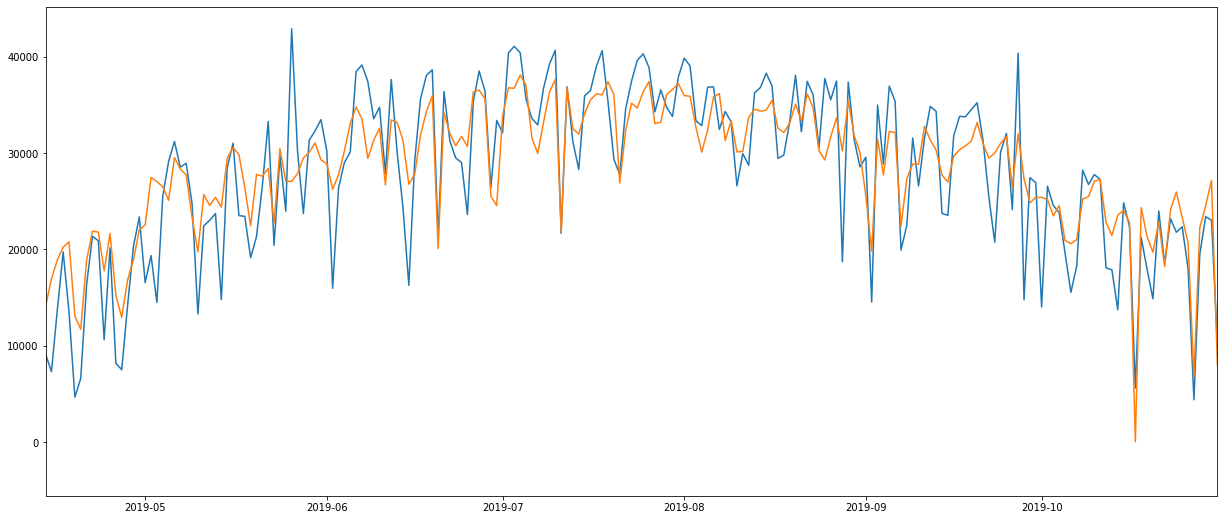

In [66]:
# Prediction for 2019 only
plt.figure(figsize=[21,9])
plt.plot(features_matrix.index, target_vector, features_matrix.index, model.predict(features_matrix))
plt.xlim(left='2019-04-14', right='2019-10-31')
plt.show()

In [67]:
# RMSE using data prior to 2019
model.fit(features_matrix.loc[pd.to_datetime(features_matrix.index).year < 2019], target_vector.loc[pd.to_datetime(target_vector.index).year < 2019])
error = mean_squared_error(model.predict(features_matrix.loc[pd.to_datetime(features_matrix.index).year == 2019]), target_vector.loc[pd.to_datetime(target_vector.index).year == 2019])
print(math.sqrt(error))

4582.055901785887


#### Add Feature: Number of Membership Users

In [69]:
#obtaining number of users
members_df = df1
members_df['date'] = members_df['start_date'].dt.date
members_df = members_df.groupby(['date']).sum()
members_df

,is_member
date,
2014-04-15,1529
2014-04-16,3045
2014-04-17,5439
2014-04-18,4759
2014-04-19,4872
...,...
2019-10-27,3474
2019-10-28,17874
2019-10-29,21168


In [75]:
#adding number of members to feature matrix
features_matrix = pd.concat([features_matrix, members_df], axis=1).rename(columns={'is_member':'Membership Users'})
features_matrix

,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,May,June,July,August,September,October,November,Stations,Mean Temp (°C),Total Precip (mm),Spd of Max Gust (km/h),Membership Users
date,,,,,,,,,,,,,,,,,,
2014-04-15,1,0,0,0,0,0,0,0,0,0,0,0,0,459.0,6.2,11.8,31,1529
2014-04-16,0,1,0,0,0,0,0,0,0,0,0,0,0,459.0,-3.4,0.0,31,3045
2014-04-17,0,0,1,0,0,0,0,0,0,0,0,0,0,459.0,1.1,0.0,31,5439
2014-04-18,0,0,0,1,0,0,0,0,0,0,0,0,0,459.0,6.2,0.0,31,4759
2014-04-19,0,0,0,0,1,0,0,0,0,0,0,0,0,459.0,4.8,1.0,31,4872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-27,0,0,0,0,0,1,0,0,0,0,0,1,0,619.0,6.5,34.3,55,3474
2019-10-28,0,0,0,0,0,0,0,0,0,0,0,1,0,619.0,8.7,0.4,55,17874
2019-10-29,1,0,0,0,0,0,0,0,0,0,0,1,0,619.0,10.0,0.2,54,21168


#### Prediction of Daily Bixi Usage in 2019 (without using 2019 data, we don't cheat in here)

#### Actual vs. Predicted 2019 graph

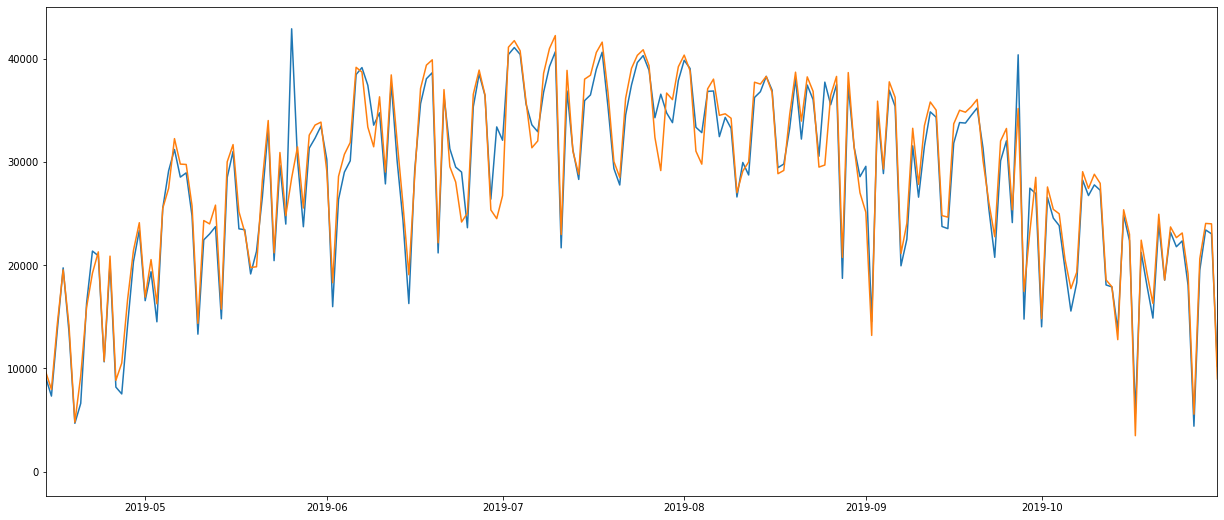

In [77]:
# Graph Prediction for 2019 only
plt.figure(figsize=[21,9])
plt.plot(features_matrix.index, target_vector, features_matrix.index, model.predict(features_matrix))
plt.xlim(left='2019-04-14', right='2019-10-31')
plt.show()

#### RMSE value

In [76]:
#Calculating RMSE using data prior to 2019
model.fit(features_matrix.loc[pd.to_datetime(features_matrix.index).year < 2019], target_vector.loc[pd.to_datetime(target_vector.index).year < 2019])
error = mean_squared_error(model.predict(features_matrix.loc[pd.to_datetime(features_matrix.index).year == 2019]), target_vector.loc[pd.to_datetime(target_vector.index).year == 2019])
print(math.sqrt(error))

2066.243772125678
